# Ejercicio 8 (opcional)

En este ejercicio se busca resolver numéricamente la ecuación de un fluido con densidad variable

\begin{equation}
    \begin{split}
        &\frac{\partial \rho}{\partial t} +\vec{\nabla}\cdot(\rho \vec{v})=0\\
        &\rho\left(\frac{\partial \vec{v}}{\partial t}+(\vec{v}\cdot\vec{\nabla})\vec{v}\right)=-\vec{\nabla}P+\rho\vec{g}\\
        &P=k\rho^\gamma
    \end{split}
\end{equation}

donde $\rho$ representa la densidad de masa, $\vec{v}$ la velocidad del fluido, $P$ la presión interna, $\vec{g}$ es la aceleración gravitacional y con $κ$ y $\gamma$ dos constantes que definen la ecuación de estado del fluido descrito. Considere el caso particular de una distribución de materia, descrita por estas ecuaciones, con la
forma de un disco delgado (i.e. el problema será 2-dimensional) localizado en el plano ecuatorial alrededor de una fuente de gravedad puntual (i.e. se considerará simetría esferica). Introduzca coordenadas cilíndricas $(r,\;\phi,\;z)$ y reescriba las ecuaciones en términos de la densidad superficial de masa,

\begin{equation}
    \Sigma=\int_0^h\rho(t,r,\phi) dz
\end{equation}

con h el ancho del disco, el cual se considerará como una cantidad constante pequeña.

Utilizando las coordenadas cilíndricas, reescriba las ecuaciones como un sistema diferencial para las funciones:

- Densidad supericial: $\Sigma(t,\;r,\;\phi)$
- Componente radial de la velocidad $v^r(t,\;r,\;\phi)$
- Componente tangencial de la velocidad $v^\phi(t,\;r,\;\phi)$
- Presión: $P(t,\;r,\;\phi)$

La aceleración gravitacional debida al objeto central tendrá la forma

\begin{equation}
    \vec{g}=-\frac{GM}{r^3}\vec{r}
\end{equation}

donde G es la constante gravitacional Newtoniana y M es la masa del cuerpo central.

Construya un código que resuelva numéricamente este problema para encontrar las cuatro funciones de interés bajo las siguientes condiciones:

- M = 10 M⊙
- $κ$ = $1.2 \times 10^{15} \times 0.5^\gamma \;dyn \;cm−2 \;(g−1 \;cm3 )^\gamma$
- $\gamma$ = $\frac{3}{5}$
- h = 1 km

El disco debe poseer un radio interno de $r_i$ = $180$ $km$ y un radio externo de $r_f$ = $4000$ $km$. 

Las condiciones iniciales para las funciones serán

- $\Sigma(0,\;r,\;\phi)$ = $\frac{1}{2\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{r-r_0}{\sigma}\right)^2}$
- $v^r(0,\;r,\;\phi)$ = 0
- $v^\phi(0,\;r,\;\phi)$ = $\sqrt{\frac{GM}{r}}$

donde $r_0$ = $1500$ $km$ y $\sigma$ = $600$ $km$. Imponga condiciones de frontera de outflow (gradiente cero) tanto en $r_i$ como en $r_f$. Finalmente, evolucione el sistema por un intervalo de tiempo adecuado y muestre gráficamente la dinámica de las funciones encontradas.


----

## Ecuaciones en Cilíndricas

En primer lugar, veamos como se ven estas ecuaciones en coordenada cilíndricas. Empecemos por recordar como es la divergencia en cilíndricas

\begin{equation}
    \vec{\nabla}\cdot\vec{F}=\frac{1}{r}\partial_r(rF_r)+\frac{1}{r}\partial_\phi(F_\phi)+\partial_z(F_z)
\end{equation}

Entonces, la ecuación de continuidad resulta ser 

\begin{equation}
    \partial_t\rho +\frac{1}{r}\partial_r(r\rho v_r)+\frac{1}{r}\partial_\phi(\rho v_\phi)+\partial_z(\rho v_z)=0
\end{equation}

La ecuación de Euler es 

\begin{equation}
    \begin{split}
        &\rho\;\partial_t\vec{v} +\rho\left(v_r\partial_r+v_\phi\frac{1}{r}\partial_\phi+v_z\partial_z\right)\vec{v}=-\vec{\nabla} P +\rho\vec{g}\\
    \end{split}
\end{equation}

Reduciendo esta ecuación por componentes tenemos que

\begin{equation}
    \begin{split}
        &r:\;\; \partial_t v_r + v_r\partial_rv_r + \frac{v_\phi}{r}\partial_\phi v_r + v_z\partial_z v_r = -\frac{\partial_rP}{\rho}+g_r\\
        &\phi:\;\; \partial_t v_\phi + v_r\partial_rv_\phi + \frac{v_\phi}{r}\partial_\phi v_\phi + v_z \partial_z v_\phi = -\frac{\partial_\phi P}{\rho}+g_\phi\\
        &z:\;\; \partial_t v_z + v_r\partial_rv_z+ \frac{v_\phi}{r}\partial_\phi v_z +v_z\partial_z v_z = -\frac{\partial_zP}{\rho}+g_z\\
        &P=k\rho^\gamma
    \end{split}
\end{equation}

Ahora, hagamos algunas simplificaciones, por ejemplo, la gravedad solo tiene componente radial y además no hay movimiento en z, entonces 

\begin{equation}
    \begin{split}
        &\partial_t\rho +\frac{1}{r}\partial_r(r\rho v_r)+\frac{1}{r}\partial_\phi(\rho v_\phi)=0\\
        &r:\;\; \partial_t v_r + v_r\partial_rv_r + \frac{v_\phi}{r}\partial_\phi v_r = -\frac{\partial_rP}{\rho}+g_r\\
        &\phi:\;\; \partial_t v_\phi + v_r\partial_rv_\phi + \frac{v_\phi}{r}\partial_\phi v_\phi = -\frac{\partial_\phi P}{\rho}\\
        &P=k\rho^\gamma
    \end{split}
\end{equation}


---

## Densidad Superficial

Como la densidad no depende de z, entonces la densidad superficial es

\begin{equation}
    \Sigma=\int_0^h\rho(t,r,\phi) dz = h\rho
\end{equation}

Entonces, como h es constante, multiplicando las ecuaciones anteriores por h y 1/h, el problema en función de la densidad superficial es

\begin{equation}
    \begin{split}
        &\partial_t\Sigma +\frac{1}{r}\partial_r(r\Sigma v_r)+\frac{1}{r}\partial_\phi(\Sigma v_\phi)=0\\
        &r:\;\; \partial_t v_r + v_r\partial_rv_r + \frac{v_\phi}{r}\partial_\phi v_r = -h\frac{\partial_rP}{\Sigma}+g_r\\
        &\phi:\;\; \partial_t v_\phi + v_r\partial_rv_\phi + \frac{v_\phi}{r}\partial_\phi v_\phi = -h\frac{\partial_\phi P}{\Sigma}\\
        &P=\frac{k}{h^\gamma}\Sigma^\gamma
    \end{split}
\end{equation}


----

## Planteamiento de la simulación

### Evolución temporal

Ya que las ecuaciones que tenemos son ecuaciones diferenciales parciales, vamos a hacer una discretización que permita resolverlas de forma aproximada. Primero, para la evolución temporal, vamos a usar Runge-Kutta. Para ello reacomodamos las ecuaciones de la siguiente manera

\begin{equation}
    \begin{split}
        &\partial_t\Sigma = -\frac{1}{r}\partial_r(r\Sigma v_r)-\frac{1}{r}\partial_\phi(\Sigma v_\phi)\\
        &\partial_t v_r = -v_r\partial_rv_r - \frac{v_\phi}{r}\partial_\phi v_r - h\frac{\partial_rP}{\Sigma}+g_r\\
        &\partial_t v_\phi = -v_r\partial_rv_\phi - \frac{v_\phi}{r}\partial_\phi v_\phi - h\frac{\partial_\phi P}{\Sigma}\\
        &P=\frac{k}{h^\gamma}\Sigma^\gamma
    \end{split}
\end{equation}

De modo que el problema se reduce a calcular el lado derecho de las ecuaciones, de modo que

\begin{equation}
    \begin{split}
        &\partial_t\Sigma = f\;(r,\phi)\\
        &\partial_t v_r = g\;(r,\phi)\\
        &\partial_t v_\phi = q\;(r,\phi)
    \end{split}
\end{equation}

Ahora, vamos a buscar una forma de calcular f, g y h para el algoritmo de evolución temporal.


----

### Evolución espacial

Para la evolución temporal, vamos a discretizar las derivadas. Si tenemos un dominio discretizado en celdas, la derivada de una cantidad en el punto i utilizando derivadas centradas es

- Advección

\begin{equation}
    \partial_x \eta(x_i) = \frac{\eta(x_{i+1})-\eta(x_{i-1})}{2\Delta x}
\end{equation}

Utilizando esto, veamos como queda la función $f(r,\phi)$, el lado derecho de la ecuación de advección.

\begin{equation}
\partial_t\Sigma = -\frac{1}{r}\partial_r(r\Sigma v_r)-\frac{1}{r}\partial_\phi(\Sigma v_\phi)
\end{equation}

\begin{equation}
    \partial_t\Sigma_{i,j} = -\frac{1}{r_i}\frac{r_{i+1}\Sigma_{i+1,j}v_{r\;i+1,j}-r_{i-1}\Sigma_{i-1,j}v_{r\;i-1,j}}{2\Delta r}-\frac{1}{r_i}\frac{\Sigma_{i,j+1} v_{\phi\;i,j+1}-\Sigma_{i,j-1} v_{\phi\;i,j-1}}{2\Delta\phi}
\end{equation}

Donde el índice i corresponde a r y el índice j para $\phi$. 

- Ecuación de Euler $v_r$

\begin{equation}
\partial_t v_r = -v_r\partial_rv_r - \frac{v_\phi}{r}\partial_\phi v_r - h\frac{\partial_rP}{\Sigma}+g_r
\end{equation}

\begin{equation}
\partial_t v_{r\;i,j} = -v_{r\;i,j}\frac{v_{r\;i+1,j}-v_{r\;i-1,j}}{2\Delta r} - \frac{v_{\phi\;i,j}}{r_i}\frac{v_{r\;i,j+1}-v_{r\;i,j-1}}{2\Delta\phi} - \frac{h}{\Sigma_{i,j}}\frac{P_{i+1,j}-P_{i-1,j}}{2\Delta r}+g_{r\;i,j}
\end{equation}

- Ecuación de Euler $v_\phi$

\begin{equation}
\partial_t v_\phi = -v_r\partial_rv_\phi - \frac{v_\phi}{r}\partial_\phi v_\phi - h\frac{\partial_\phi P}{\Sigma}
\end{equation}

\begin{equation}
\partial_t v_{\phi\;i,j} = -v_{r\;i,j}\frac{v_{\phi\;i+1,j}-v_{\phi\;i-1,j}}{2\Delta r} - \frac{v_{\phi\;i,j}}{r_i}\frac{v_{\phi\;i,j+1}-v_{\phi\;i,j-1}}{2\Delta \phi} - \frac{h}{\Sigma_{i,j}}\frac{P_{i,j+1}-P_{i,j-1}}{2\Delta\phi}
\end{equation}


----

In [1]:
using StaticArrays
using Random, Distributions
using Unitful, UnitfulAstro
using PhysicalConstants
using Plots


Definimos las constantes del problema

In [2]:
rᵢ = 180           #km
rf = 4000          #km
M = 10             #M⊙
γ = 3/5
h = 1              #km
k = γ*1.2*1015*0.5u"g^(3/5) *cm^(-9/5)"
k = uconvert.(u"Msun^(3/5) *km^(-9/5)",k)
k = ustrip(k)
r₀ = 1500          #km
σ = 600            #km

G = PhysicalConstants.CODATA2018.G
G = uconvert.(u"km^3 *Msun^-1 * s^-2",G)
G = ustrip(G)

steps = 6000
dt = 400           #s
vis_steps=10

nr = 50
nϕ = 50

r = LinRange(rᵢ,rf,nr)
ϕ = LinRange(0,2*π,nϕ)

vr = zeros(nr,nϕ)
vϕ = zeros(nr,nϕ)
Σ  = ones(nr,nϕ)
p  = zeros(nr,nϕ)

#Ruido aleatorio
Random.seed!(123)
u=Uniform(-50,50)

#El grid es uniforme entonces todos los intervalos son iguales
Δr = r[2]-r[1] 
Δϕ = ϕ[2]-ϕ[1]

#Heatmap color scheme
color = cgrad(:RdBu_9, rev=true)

println("k = ", k, " km^-2 *Msun")
println("G = ", G, " km^3 Msun^-1 s^-2")

k = 3.834113780664322e-9 km^-2 *Msun
G = 1.3271244e11 km^3 Msun^-1 s^-2


Ahora, las funciones para calcular las derivadas, condiciones iniciales, la presión y la aceleración gravitatoria.

In [3]:
function P(Σ)
    p = zeros(nr,nϕ)
    for i=1:nr, j=1:nϕ
        if Σ[i,j]>1e-10
            p[i,j]=k*(Σ[i,j]/h)^γ
        else
            p[i,j]=0
        end
    end
    return p
end
function Initial_Σ(Σ,r,ϕ)
    for i=1:nr, j=1:nϕ
        Σ[i,j]=exp(-0.5*((r[i]-r₀)/σ)^2)
    end
end
function Initial_vr(vr,r)
    for i=1:nr, j=1:nϕ
        vr[i,j]=0
    end
end
function Initial_vϕ(vϕ,r)
    for i=1:nr, j=1:nϕ
        vϕ[i,j]=sqrt(G*M/r[i])
    end
end
function gᵣ(r)
    return -G*M/r^3
end
function ∂ₜΣ(Σ,vr,vϕ,r,ϕ)
    #Derivada temporal
    ∂Σ = zeros(nr,nϕ)
    
    #Calcular la derivada
    for i=2:nr-1, j=2:nϕ-1
        ∂Σ[i,j]=-(r[i+1]*Σ[i+1,j]*vr[i+1,j]-r[i-1]*Σ[i-1,j]*vr[i-1,j])/(2*r[i]*Δr)
                                         -(Σ[i,j+1]*vϕ[i,j+1]-Σ[i,j-1]*vϕ[i,j-1])/(2*r[i]*Δϕ)
    end
    
    #Outflow conditions en r
    ∂Σ[nr,:] = ∂Σ[nr-1,:]
    ∂Σ[1,:] = ∂Σ[2,:]
    
    #Periodic boundary conditions en ϕ
    for i=1:nr
        if vϕ[i,nϕ-1]>0
            ∂Σ[i,nϕ] = ∂Σ[i,nϕ-1]
            ∂Σ[i,1] = ∂Σ[i,nϕ-1]
        else
            ∂Σ[i,nϕ] = ∂Σ[i,2]
            ∂Σ[i,1] = ∂Σ[i,2]
        end
    end
    return ∂Σ
end

function ∂ₜvr(Σ,vr,vϕ,r,ϕ,p)
    #Derivada temporal
    ∂vr = zeros(nr,nϕ)
    
    #Calcular la derivada
    for i=2:nr-1, j=2:nϕ-1
        ϵ = 0
        b = 1.0
        if Σ[i,j]<1e-9
            ϵ = 1
            b = 0
        end
        ∂vr[i,j]=-vr[i,j]*(vr[i+1,j]-vr[i-1,j])/(2*Δr)-vϕ[i,j]*(vr[i,j+1]-vr[i,j-1])/(r[i]*2*Δϕ)
            -b*h*(p[i+1,j]-p[i-1,j])/(2*Δr*Σ[i,j]+ϵ)+gᵣ(r[i])
    end
    
    #Condiciones de frontera
    #Outflow conditions en r
    ∂vr[nr,:] = ∂vr[nr-1,:]
    ∂vr[1,:] = ∂vr[2,:]
    
    #Periodic boundary conditions en ϕ
    for i=1:nr
        if vϕ[i,nϕ-1]>0
            ∂vr[i,nϕ] = ∂vr[i,nϕ-1]
            ∂vr[i,1] = ∂vr[i,nϕ-1]
        else
            ∂vr[i,nϕ] = ∂vr[i,2]
            ∂vr[i,1] = ∂vr[i,2]
        end
    end
    return ∂vr
end
function ∂ₜvϕ(Σ,vr,vϕ,r,ϕ,p)
    #Derivada temporal
    ∂vϕ = zeros(nr,nϕ)
    
    #Calcular la derivada
    for i=2:nr-1, j=2:nϕ-1
        ϵ = 0
        b = 1
        if Σ[i,j]<1e-9
            ϵ = 1
            b = 0
        end
        ∂vϕ[i,j]=-vr[i,j]*(vϕ[i+1,j]-vr[i-1,j])/(2*Δr)-vϕ[i,j]*(vϕ[i,j+1]-vϕ[i,j-1])/(r[i]*2*Δϕ)
                                                                   -b*h*(p[i,j+1]-p[i,j-1])/(2*Δr*Σ[i,j]+ϵ)
    end
    
    #Condiciones de frontera
    #Outflow conditions in r
    ∂vϕ[nr,:] = ∂vϕ[nr-1,:]
    ∂vϕ[1,:] = ∂vϕ[2,:]
    
    #Periodic boundary conditions en ϕ
    for i=1:nr
        if vϕ[i,nϕ-1]>0
            ∂vϕ[i,nϕ] = ∂vϕ[i,nϕ-1]
            ∂vϕ[i,1] = ∂vϕ[i,nϕ-1]
        else
            ∂vϕ[i,nϕ] = ∂vϕ[i,2]
            ∂vϕ[i,1] = ∂vϕ[i,2]
        end
    end
    return ∂vϕ
end

∂ₜvϕ (generic function with 1 method)

Inicializamos el sistema.

In [4]:
Initial_Σ(Σ,r,ϕ)
Initial_vr(vr,r)
Initial_vϕ(vϕ,r)

println("Initialized")

Initialized


Ahora, hacemos la integración temporal con Rung-Kutta

In [5]:
printΣ = Matrix{Float64}[]
printvr = Matrix{Float64}[]
printvϕ = Matrix{Float64}[]

push!(printΣ, deepcopy(Σ))
push!(printvr, deepcopy(vr))
push!(printvϕ, deepcopy(vϕ))

function integrate(Σ,vr,vϕ,r,ϕ,steps,dt,vis_steps,printΣ,printvr,printvϕ)
    for i=1:steps    
        p=P(Σ)
        k1Σ = ∂ₜΣ(Σ,vr,vϕ,r,ϕ)*dt
        k1vr = ∂ₜvr(Σ,vr,vϕ,r,ϕ,p)*dt
        k1vϕ = ∂ₜvϕ(Σ,vr,vϕ,r,ϕ,p)*dt
    
        Σaux=Σ+k1Σ/2; vraux=vr+k1vr/2; vϕaux=vϕ+k1vϕ/2;
        p=P(Σaux)
        k2Σ = ∂ₜΣ(Σaux,vraux,vϕaux,r,ϕ)*dt
        k2vr = ∂ₜvr(Σaux,vraux,vϕaux,r,ϕ,p)*dt
        k2vϕ = ∂ₜvϕ(Σaux,vraux,vϕaux,r,ϕ,p)*dt
    
        Σaux=Σ+k2Σ/2; vraux=vr+k2vr/2; vϕaux=vϕ+k2vϕ/2;
        p=P(Σaux)
        k3Σ = ∂ₜΣ(Σaux,vraux,vϕaux,r,ϕ)*dt
        k3vr = ∂ₜvr(Σaux,vraux,vϕaux,r,ϕ,p)*dt
        k3vϕ = ∂ₜvϕ(Σaux,vraux,vϕaux,r,ϕ,p)*dt
    
        Σaux=Σ+k3Σ; vraux=vr+k3vr; vϕaux=vϕ+k3vϕ;
        p=P(Σaux)
        k4Σ = ∂ₜΣ(Σaux,vraux,vϕaux,r,ϕ)*dt
        k4vr = ∂ₜvr(Σaux,vraux,vϕaux,r,ϕ,p)*dt
        k4vϕ = ∂ₜvϕ(Σaux,vraux,vϕaux,r,ϕ,p)*dt
    
        Σ +=(k1Σ  + 2*k2Σ  + 2*k3Σ  + k4Σ)/6 
        vr+=(k1vr + 2*k2vr + 2*k3vr + k4vr)/6 
        vϕ+=(k1vϕ + 2*k2vϕ + 2*k3vϕ + k4vϕ)/6 
    
        if i%vis_steps==0
            push!(printΣ, deepcopy(Σ))
            push!(printvr, deepcopy(vr))
            push!(printvϕ, deepcopy(vϕ))
        end
    end
end

integrate(Σ,vr,vϕ,r,ϕ,steps,dt,vis_steps,printΣ,printvr,printvϕ)

Finalmente, visualizamos la solución.

┌ Info: Precompiling GR_jll [d2c73de3-f751-5644-a686-071e5b155ba9]
└ @ Base loading.jl:1423
┌ Warning: Module FFMPEG_jll with build ID 3110597680029459 is missing from the cache.
│ This may mean FFMPEG_jll [b22a6f82-2f65-5046-a5b2-351ab43fb4e5] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1107
┌ Info: Skipping precompilation since __precompile__(false). Importing GR_jll [d2c73de3-f751-5644-a686-071e5b155ba9].
└ @ Base loading.jl:1124
┌ Info: Saved animation to 
│   fn = /Users/eduard/Downloads/EjerciciosAC2022/HD-1/Euler1_2D.gif
└ @ Plots /Users/eduard/.julia/packages/Plots/dNEbX/src/animation.jl:114


Plots.AnimatedGif("/Users/eduard/Downloads/EjerciciosAC2022/HD-1/Euler1_2D.gif")
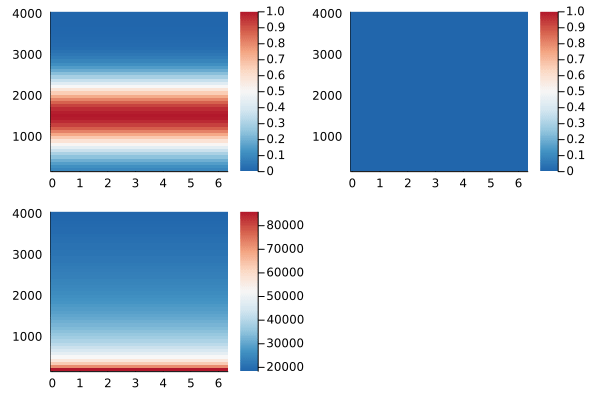

In [8]:
anim = @animate for i in 1:length(printΣ)
    hm1 = heatmap(ϕ,r,printΣ[i],clim=(0, 1), c=color)
    hm2 = heatmap(ϕ,r,printvr[i], c=color)
    hm3 = heatmap(ϕ,r,printvϕ[i], c=color)
    plot(hm1,hm2,hm3)
end
gif(anim, "Euler1_2D.gif", fps = 15)

## La animaciones, en orden son $\Sigma$, $v_r$ y $v_\phi$

Debido a las condiciones iniciales, el flujo es estacionario. Introduzcamos una pequeña perturbación para ver que pasa.

In [9]:
function Initial_Σ(Σ,r,ϕ)
    for i=1:nr, j=1:nϕ
        Σ[i,j]=exp(-0.5*((r[i]-r₀)/σ)^2)+0.00005*rand(u)
    end
end
function Initial_vr(vr,r)
    for i=1:nr, j=1:nϕ
        vr[i,j]=-1e-4
    end
end

Initial_Σ(Σ,r,ϕ)
Initial_vr(vr,r)
Initial_vϕ(vϕ,r)

printΣ = Matrix{Float64}[]
printvr = Matrix{Float64}[]
printvϕ = Matrix{Float64}[]

push!(printΣ, deepcopy(Σ))
push!(printvr, deepcopy(vr))
push!(printvϕ, deepcopy(vϕ))

integrate(Σ,vr,vϕ,r,ϕ,steps,dt,vis_steps,printΣ,printvr,printvϕ)

┌ Info: Saved animation to 
│   fn = /Users/eduard/Downloads/EjerciciosAC2022/HD-1/Euler2_2D.gif
└ @ Plots /Users/eduard/.julia/packages/Plots/dNEbX/src/animation.jl:114


Plots.AnimatedGif("/Users/eduard/Downloads/EjerciciosAC2022/HD-1/Euler2_2D.gif")
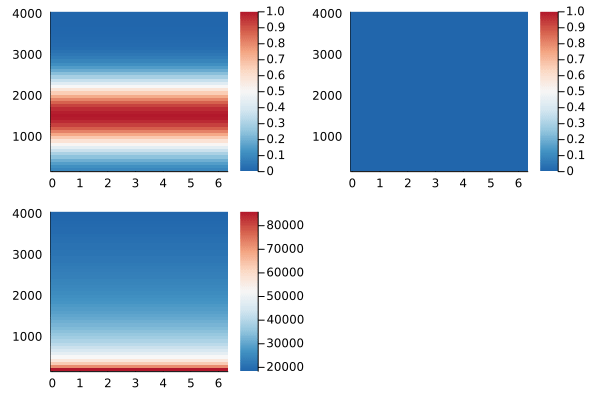

In [6]:
anim = @animate for i in 1:length(printΣ)
    hm1 = heatmap(ϕ,r,printΣ[i],clim=(0, 1), c=color)
    hm2 = heatmap(ϕ,r,printvr[i], c=color)
    hm3 = heatmap(ϕ,r,printvϕ[i], c=color)
    plot(hm1,hm2,hm3)
end
gif(anim, "Euler2_2D.gif", fps = 15)

Vemos que la velocidad en $\phi$ aumenta significativamente y además la distribución de masa empieza a esparcirse para ocupar todo el disco.

Podemos también colocar una sección moviendose hacia la derecha y la otra hacia la izquierda y seguiría estando en equilibrio debido a que no hay viscosidad.

In [11]:
function Initial_vϕ(vϕ,r)
    for i=1:nr, j=1:nϕ
        if r[i]<rf/2
            vϕ[i,j]=sqrt(G*M/r[i])
        else
            vϕ[i,j]=-sqrt(G*M/r[i])
        end
    end
end

Initial_Σ(Σ,r,ϕ)
Initial_vr(vr,r)
Initial_vϕ(vϕ,r)

printΣ = Matrix{Float64}[]
printvr = Matrix{Float64}[]
printvϕ = Matrix{Float64}[]
push!(printΣ, deepcopy(Σ))
push!(printvr, deepcopy(vr))
push!(printvϕ, deepcopy(vϕ))

integrate(Σ,vr,vϕ,r,ϕ,steps,dt,vis_steps,printΣ,printvr,printvϕ)

┌ Info: Saved animation to 
│   fn = /Users/eduard/Downloads/EjerciciosAC2022/HD-1/Euler3_2D.gif
└ @ Plots /Users/eduard/.julia/packages/Plots/dNEbX/src/animation.jl:114


Plots.AnimatedGif("/Users/eduard/Downloads/EjerciciosAC2022/HD-1/Euler3_2D.gif")
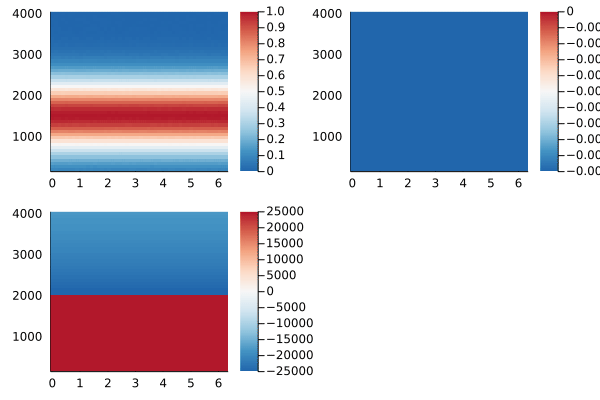

In [12]:
anim = @animate for i in 1:length(printΣ)
    hm1 = heatmap(ϕ,r,printΣ[i],clim=(0, 1), c=color)
    hm2 = heatmap(ϕ,r,printvr[i], c=color)
    hm3 = heatmap(ϕ,r,printvϕ[i],clim=(-25e3, 25e3), c=color)
    plot(hm1,hm2,hm3)
end

gif(anim, "Euler3_2D.gif", fps = 15)

Para ponerle viscosidad y tener la ecuación de Navier-Stockes completa, las ecuaciones resultan

\begin{equation}
    \begin{split}
        &\frac{\partial \rho}{\partial t} +\vec{\nabla}\cdot(\rho \vec{v})=0\\
        &\rho\left(\frac{\partial \vec{v}}{\partial t}+(\vec{v}\cdot\vec{\nabla})\vec{v}\right)=-\vec{\nabla}P+\rho\vec{g}+\mu\nabla^2\vec{v}\\
        &P=k\rho^\gamma
    \end{split}
\end{equation}

Donde $\mu$ es la viscosidad dinámica. Las ecuaciones quedan casi igual, solo hay que añadir el término del laplaciano:

\begin{equation}
    \begin{split}
        &r:\;\; \partial_t v_r + v_r\partial_rv_r + \frac{v_\phi}{r}\partial_\phi v_r + v_z\partial_z v_r = -\frac{\partial_rP}{\rho}+g_r+\frac{\mu}{\rho}\left(\frac{1}{r}\partial_r(r\partial_r v_r)+\frac{1}{r^2}\partial^2_\phi v_r+\partial^2_z v_r-\frac{v_r}{r^2}-\frac{2}{r^2}\partial_\phi v_\phi\right)\\
        &\phi:\;\; \partial_t v_\phi + v_r\partial_rv_\phi + \frac{v_\phi}{r}\partial_\phi v_\phi + v_z \partial_z v_\phi = -\frac{\partial_\phi P}{\rho}+g_\phi+\frac{\mu}{\rho}\left(\frac{1}{r}\partial_r(r\partial_r v_\phi)+\frac{1}{r^2}\partial^2_\phi v_\phi+\partial^2_z v_\phi+\frac{2}{r^2}\partial_\phi v_r-\frac{v_\phi}{r^2}\right)\\
        &z:\;\; \partial_t v_z + v_r\partial_rv_z+ \frac{v_\phi}{r}\partial_\phi v_z +v_z\partial_z v_z = -\frac{\partial_zP}{\rho}+g_z+\frac{\mu}{\rho}\left(\frac{1}{r}\partial_r(r\partial_r v_z)+\frac{1}{r^2}\partial^2_z v_\phi+\partial^2_z v_z\right)\\
        &P=k\rho^\gamma
    \end{split}
\end{equation}

Recordando que la gravedad solo tiene componente radial y además no hay movimiento en z, entonces 

\begin{equation}
    \begin{split}
        &\partial_t\rho +\frac{1}{r}\partial_r(r\rho v_r)+\frac{1}{r}\partial_\phi(\rho v_\phi)=0\\
        &r:\;\; \partial_t v_r + v_r\partial_rv_r + \frac{v_\phi}{r}\partial_\phi v_r = -\frac{\partial_rP}{\rho}+g_r+\frac{\mu}{\rho}\left(\frac{1}{r}\partial_r(r\partial_r v_r)+\frac{1}{r^2}\partial^2_\phi v_r-\frac{v_r}{r^2}-\frac{2}{r^2}\partial_\phi v_\phi\right)\\
        &\phi:\;\; \partial_t v_\phi + v_r\partial_rv_\phi + \frac{v_\phi}{r}\partial_\phi v_\phi = -\frac{\partial_\phi P}{\rho}+\frac{\mu}{\rho}\left(\frac{1}{r}\partial_r(r\partial_r v_\phi)+\frac{1}{r^2}\partial^2_\phi v_\phi+\frac{2}{r^2}\partial_\phi v_r-\frac{v_\phi}{r^2}\right)\\
        &P=k\rho^\gamma
    \end{split}
\end{equation}


Con estas ecuaciones estamos considerando un fluido incompresible con viscosidad constante.

----

Hagamos solo la discretización del término nuevo, para eso recordemos que

\begin{equation}
    \partial_x \eta_{i} = \frac{\eta_{i+1}-\eta_{i-1}}{2\Delta x}
\end{equation}

\begin{equation}
    \partial^2_x\eta_{i} = \frac{\eta_{i+1}-2\eta_{i}+\eta_{i-1}}{\Delta x^2}
\end{equation}

y también que

\begin{equation}
    \partial_x(x\partial_x\eta_{i}) = \partial_x\eta_{i}+x_{i}\partial^2_x\eta_{i}=\frac{\eta_{i+1}-\eta_{i-1}}{2\Delta x}+ x_{i}\frac{\eta_{i+1}-2\eta_{i}+\eta_{i-1}}{\Delta x^2}
\end{equation}

Entonces

\begin{equation}
\frac{\mu}{\rho_{i,j}}\left(\frac{1}{r_{i,j}}\partial_r(r_{i,j}\partial_r v_{r\;i,j})+\frac{1}{r^2_{i,j}}\partial^2_\phi v_{r\;i,j}-\frac{v_{r\;i,j}}{r^2_{i,j}}-\frac{2}{r^2_{i,j}}\partial_\phi v_{\phi\;i,j}\right)=
\frac{\mu}{\rho_{i,j}r_{i,j}}\left(\frac{v_{r\;i+1,j}-v_{r\;i-1,j}}{2\Delta r}+ r_{i,j}\frac{v_{r\;i+1,j}-2v_{r\;i,j}+v_{r\;i-1,j}}{\Delta r^2}+\frac{1}{r_{i,j}}\frac{v_{r\;i,j+1}-2v_{r\;i,j}+v_{r\;i,j-1}}{\Delta \phi^2}-\frac{v_{r\;i,j}}{r_{i,j}}-\frac{2}{r_{i,j}}\frac{v_{\phi\;i,j+1}-v_{\phi\;i,j-1}}{2\Delta \phi}\right)
\end{equation}

Para la otra componente 

\begin{equation}
\frac{\mu}{\rho}\left(\frac{1}{r_{i,j}}\partial_r(r_{i,j}\partial_r v_{\phi\;i,j})+\frac{1}{r^2_{i,j}}\partial^2_\phi v_{\phi\;i,j}+\frac{2}{r^2_{i,j}}\partial_\phi v_{r\;i,j}-\frac{v_{\phi\;i,j}}{r^2_{i,j}}\right)=
\frac{\mu}{\rho r_{i,j}}\left(\frac{v_{\phi\;i+1,j}-v_{\phi\;i-1,j}}{2\Delta r}+ r_{i,j}\frac{v_{\phi\;i+1,j}-2v_{\phi\;i,j}+v_{\phi\;i-1,j}}{\Delta r^2}+\frac{1}{r_{i,j}}\frac{v_{\phi\;i,j+1}-2v_{\phi\;i,j}+v_{\phi\;i,j-1}}{\Delta \phi^2}+\frac{2}{r_{i,j}}\frac{v_{r\;i,j+1}-v_{r\;i,j-1}}{2\Delta \phi}-\frac{v_{\phi\;i,j}}{r_{i,j}}\right)
\end{equation}


----

Según el modelo α-Disk, la viscosidad del disco de acresión de un agujero negro es

\begin{equation}
   \mu=\alpha c_s h
\end{equation}

Donde $\alpha$ es un parametro entr 0 y 1, h el grosor del disco y $c_s$ la velocidad del sonido. También encontré otros modelos pero son muy complicados o implican una viscosidad variable, entonces no los utilizaré para este ejemplo.

Como no encontré un valor para la velocidad del sonido o directamente la viscosidad del disco, me voy a inventar uno

In [13]:
μ = 1e-9 #Msun *km *s^-1 en estas unidades, esta es más o menos la viscosidad de algunas lavas muy espesas

1.0e-9

Adaptando el código para incluir el laplaciano se tiene

In [14]:
function ∂ₜvr(Σ,vr,vϕ,r,ϕ,p)
    #Derivada temporal
    ∂vr = zeros(nr,nϕ)
    
    #Calcular la derivada
    for i=2:nr-1, j=2:nϕ-1
        ϵ = 0
        b = 1.0
        if Σ[i,j]<1e-9
            ϵ = 1
            b = 0
        end
        ∂vr[i,j]=-vr[i,j]*(vr[i+1,j]-vr[i-1,j])/(2*Δr)-vϕ[i,j]*(vr[i,j+1]-vr[i,j-1])/(r[i]*2*Δϕ)
        -b*h*(p[i+1,j]-p[i-1,j])/(2*Δr*Σ[i,j]+ϵ)+gᵣ(r[i])+(b*μ*h/(r[i]*Σ[i,j]+ϵ))*((vr[i+1,j]-vr[i-1,j])/(2*Δr)+
        r[i]*(vr[i+1,j]-2*vr[i,j]+vr[i-1,j])/(Δr^2)+(vr[i,j+1]-2*vr[i,j]+vr[i,j-1])/(r[i]*Δϕ^2)-
        (vr[i,j])/(r[i])-(vr[i,j+1]-vr[i,j-1])/(r[i]*Δϕ))
    end
    
    #Condiciones de frontera
    #Outflow conditions in r
    ∂vr[nr,:] = ∂vr[nr-1,:]
    ∂vr[1,:] = ∂vr[2,:]
    
    #Periodic boundary conditions in ϕ
    for i=1:nr
        if vϕ[i,nϕ-1]>0
            ∂vr[i,nϕ] = ∂vr[i,nϕ-1]
            ∂vr[i,1] = ∂vr[i,nϕ-1]
        else
            ∂vr[i,nϕ] = ∂vr[i,2]
            ∂vr[i,1] = ∂vr[i,2]
        end
    end
    return ∂vr
end
function ∂ₜvϕ(Σ,vr,vϕ,r,ϕ,p)
    #Derivada temporal
    ∂vϕ = zeros(nr,nϕ)
    
    #Calcular la derivada
    for i=2:nr-1, j=2:nϕ-1
        ϵ = 0
        b = 1
        if Σ[i,j]<1e-9
            ϵ = 1
            b = 0
        end
        ∂vϕ[i,j]=-vr[i,j]*(vϕ[i+1,j]-vr[i-1,j])/(2*Δr)-vϕ[i,j]*(vϕ[i,j+1]-vϕ[i,j-1])/(r[i]*2*Δϕ)
        -b*h*(p[i,j+1]-p[i,j-1])/(2*Δr*Σ[i,j]+ϵ)+(b*μ*h/(r[i]*Σ[i,j]+ϵ))*((vϕ[i+1,j]-vϕ[i-1,j])/(2*Δr)+
        r[i]*(vϕ[i+1,j]-2*vϕ[i,j]+vϕ[i-1,j])/(Δr^2)+(vϕ[i,j+1]-2*vϕ[i,j]+vϕ[i,j-1])/(r[i]*Δϕ^2)-
        (vϕ[i,j])/(r[i])+(vϕ[i,j+1]-vϕ[i,j-1])/(r[i]*Δϕ))
    end
    
    #Condiciones de frontera
    #Outflow conditions in r
    ∂vϕ[nr,:] = ∂vϕ[nr-1,:]
    ∂vϕ[1,:] = ∂vϕ[2,:]
    
    #Periodic boundary conditions in ϕ
    for i=1:nr
        if vϕ[i,nϕ-1]>0
            ∂vϕ[i,nϕ] = ∂vϕ[i,nϕ-1]
            ∂vϕ[i,1] = ∂vϕ[i,nϕ-1]
        else
            ∂vϕ[i,nϕ] = ∂vϕ[i,2]
            ∂vϕ[i,1] = ∂vϕ[i,2]
        end
    end
    return ∂vϕ
end

∂ₜvϕ (generic function with 1 method)

Con esto, la solución anterior es

In [15]:
Initial_Σ(Σ,r,ϕ)
Initial_vr(vr,r)
Initial_vϕ(vϕ,r)

printΣ = Matrix{Float64}[]
printvr = Matrix{Float64}[]
printvϕ = Matrix{Float64}[]
push!(printΣ, deepcopy(Σ))
push!(printvr, deepcopy(vr))
push!(printvϕ, deepcopy(vϕ))

integrate(Σ,vr,vϕ,r,ϕ,steps,dt,vis_steps,printΣ,printvr,printvϕ)

┌ Info: Saved animation to 
│   fn = /Users/eduard/Downloads/EjerciciosAC2022/HD-1/Euler4_2D.gif
└ @ Plots /Users/eduard/.julia/packages/Plots/dNEbX/src/animation.jl:114


Plots.AnimatedGif("/Users/eduard/Downloads/EjerciciosAC2022/HD-1/Euler4_2D.gif")
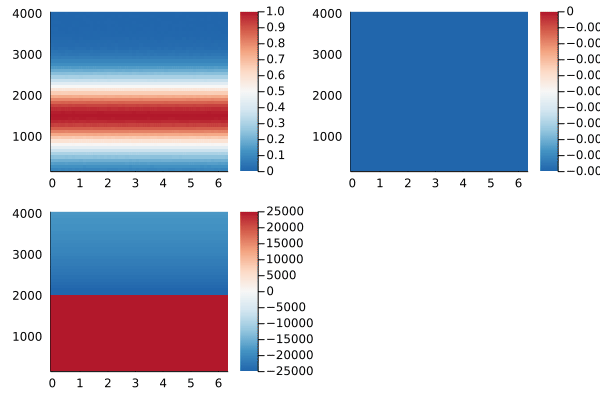

In [16]:
anim = @animate for i in 1:length(printΣ)
    hm1 = heatmap(ϕ,r,printΣ[i],clim=(0, 1), c=color)
    hm2 = heatmap(ϕ,r,printvr[i], c=color)
    hm3 = heatmap(ϕ,r,printvϕ[i],clim=(-25e3, 25e3), c=color)
    plot(hm1,hm2,hm3)
end

gif(anim, "Euler4_2D.gif", fps = 15)

Este método numérico es muy inestable, una perturbación ligeramente grande hace que todo explote. Utilizar Runge-Kutta ayuda mucho, con una derivada forward en el tiempo es necesario un dt muy pequeño. La verdad esta no es una muy buena forma de de resolver esta ecuación numéricamente.